<a href="https://colab.research.google.com/github/webminst/TCC/blob/main/Kmeans_Ind128CAR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy  as np #para manipular os vetores
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans #para usar o KMeans

In [ ]:
#### 1° etapa, localização dos centroides  ####
def centroidesIniciais(df_dados, k):
  df_centroides = df_dados.sample(n=k, replace=False, random_state=np.random.random_integers(0, len(df_dados)) )
  df_centroides.pop('cluster') #remove a coluna cluster
  df_centroides.pop('distance') #remove a coluna distance
  return df_centroides

In [ ]:
Centroides = np.array(
   #matriz com os valores dos centroides
   [[0x20, 0x20], #Centroide 1
   [(0xe0 - 256), 0x20],  #Centroide 2
   [(0xe0 - 256), (0xe0 - 256)],  #Centroide 3
   [0x20, (0xe0 - 256),]]) #Centroide 4

In [ ]:
print(Centroides)

[[ 32  32]
 [-32  32]
 [-32 -32]
 [ 32 -32]]


In [ ]:
Individuos = np.array(
#matriz com os valores dos indivíduos
[[0x1a, 0xb],
[0x3e, 0x3e],
[0x30, 0x25],
[0x33, 0x9],
[0x3d, 0x14],
[0xe, 0x16],
[0x37, 0x2f],
[0x16, 0x3b],
[0x31, 0x3f],
[0xc, 0xd],
[0xf, 0x2c],
[0x36, 0x19],
[0x3f, 0x13],
[0x5, 0x2e],
[0x2b, 0x16],
[0x18, 0xf],
[0x21, 0x2c],
[0x1d, 0x35],
[0x3c, 0x20],
[0x30, 0x25],
[0x3c, 0x8],
[0x14, 0x7],
[0x7, 0x26],
[0x11, 0x2d],
[0x9, 0xd],
[0x1e, 0x3b],
[0x16, 0x20],
[0x28, 0x13],
[0x31, 0x29],
[0x28, 0x36],
[0x2c, 0xd],
[0x5, 0x11],
[(0xf3 - 256), 0x2b],
[(0xf9 - 256), 0x3b],
[(0xdd - 256), 0x3e],
[(0xd4 - 256), 0x3c],
[(0xdd - 256), 0xe],
[(0xeb - 256), 0x14],
[(0xc2 - 256), 0xb],
[(0xe8 - 256), 0x28],
[(0xe6 - 256), 0x6],
[(0xf0 - 256), 0x3e],
[(0xf8 - 256), 0x35],
[(0xc9 - 256), 0x9],
[(0xea - 256), 0x11],
[(0xe3 - 256), 0x35],
[(0xd7 - 256), 0x26],
[(0xf2 - 256), 0x29],
[(0xf4 - 256), 0xf],
[(0xf3 - 256), 0x16],
[(0xf5 - 256), 0x39],
[(0xde - 256), 0xb],
[(0xf2 - 256), 0x10],
[(0xd5 - 256), 0x8],
[(0xea - 256), 0x5],
[(0xeb - 256), 0x38],
[(0xf6 - 256), 0x21],
[(0xea - 256), 0xa],
[(0xe6 - 256), 0x3c],
[(0xd5 - 256), 0x38],
[(0xe9 - 256), 0x16],
[(0xe3 - 256), 0xe],
[(0xef - 256), 0x36],
[(0xc1 - 256), 0x20],
[(0xc8 - 256), (0xcb - 256)],
[(0xf0 - 256), (0xe2 - 256)],
[(0xf0 - 256), (0xd4 - 256)],
[(0xd1 - 256), (0xde - 256)],
[(0xd3 - 256), (0xdc - 256)],
[(0xc5 - 256), (0xcd - 256)],
[(0xe7 - 256), (0xed - 256)],
[(0xe8 - 256), (0xd9 - 256)],
[(0xcf - 256), (0xd4 - 256)],
[(0xd4 - 256), (0xe4 - 256)],
[(0xea - 256), (0xe8 - 256)],
[(0xf4 - 256), (0xee - 256)],
[(0xca - 256), (0xd8 - 256)],
[(0xf3 - 256), (0xea - 256)],
[(0xda - 256), (0xd6 - 256)],
[(0xf7 - 256), (0xe6 - 256)],
[(0xfa - 256), (0xcc - 256)],
[(0xdb - 256), (0xc1 - 256)],
[(0xf8 - 256), (0xd4 - 256)],
[(0xda - 256), (0xd3 - 256)],
[(0xcb - 256), (0xe7 - 256)],
[(0xcc - 256), (0xc6 - 256)],
[(0xd6 - 256), (0xf4 - 256)],
[(0xdd - 256), (0xda - 256)],
[(0xd1 - 256), (0xde - 256)],
[(0xec - 256), (0xf5 - 256)],
[(0xf8 - 256), (0xe7 - 256)],
[(0xc9 - 256), (0xda - 256)],
[(0xdc - 256), (0xc2 - 256)],
[(0xcd - 256), (0xd5 - 256)],
[(0xfa - 256), (0xd4 - 256)],
[(0xe7 - 256), (0xe1 - 256)],
[0x2f, (0xf0 - 256)],
[0x32, (0xf1 - 256)],
[0x8, (0xcb - 256)],
[0x6, (0xd9 - 256)],
[0x2f, (0xe6 - 256)],
[0xa, (0xe3 - 256)],
[0xb, (0xec - 256)],
[0x7, (0xf8 - 256)],
[0x21, (0xc8 - 256)],
[0x17, (0xc9 - 256)],
[0xf, (0xf3 - 256)],
[0x13, (0xc9 - 256)],
[0x18, (0xf7 - 256)],
[0x27, (0xd7 - 256)],
[0x7, (0xe0 - 256)],
[0x6, (0xca - 256)],
[0x24, (0xd7 - 256)],
[0x22, (0xc5 - 256)],
[0x35, (0xdd - 256)],
[0x20, (0xf9 - 256)],
[0x17, (0xc8 - 256)],
[0x28, (0xea - 256)],
[0x2d, (0xee - 256)],
[0xc, (0xfa - 256)],
[0x2c, (0xdc - 256)],
[0xa, (0xd0 - 256)],
[0x25, (0xe7 - 256)],
[0x3c, (0xec - 256)],
[0x2f, (0xc6 - 256)],
[0x23, (0xe0 - 256)],
[0x2d, (0xd9 - 256)],
[0x21, (0xfa - 256)]])

In [ ]:
print(Individuos)

[[ 26  11]
 [ 62  62]
 [ 48  37]
 [ 51   9]
 [ 61  20]
 [ 14  22]
 [ 55  47]
 [ 22  59]
 [ 49  63]
 [ 12  13]
 [ 15  44]
 [ 54  25]
 [ 63  19]
 [  5  46]
 [ 43  22]
 [ 24  15]
 [ 33  44]
 [ 29  53]
 [ 60  32]
 [ 48  37]
 [ 60   8]
 [ 20   7]
 [  7  38]
 [ 17  45]
 [  9  13]
 [ 30  59]
 [ 22  32]
 [ 40  19]
 [ 49  41]
 [ 40  54]
 [ 44  13]
 [  5  17]
 [-13  43]
 [ -7  59]
 [-35  62]
 [-44  60]
 [-35  14]
 [-21  20]
 [-62  11]
 [-24  40]
 [-26   6]
 [-16  62]
 [ -8  53]
 [-55   9]
 [-22  17]
 [-29  53]
 [-41  38]
 [-14  41]
 [-12  15]
 [-13  22]
 [-11  57]
 [-34  11]
 [-14  16]
 [-43   8]
 [-22   5]
 [-21  56]
 [-10  33]
 [-22  10]
 [-26  60]
 [-43  56]
 [-23  22]
 [-29  14]
 [-17  54]
 [-63  32]
 [-56 -53]
 [-16 -30]
 [-16 -44]
 [-47 -34]
 [-45 -36]
 [-59 -51]
 [-25 -19]
 [-24 -39]
 [-49 -44]
 [-44 -28]
 [-22 -24]
 [-12 -18]
 [-54 -40]
 [-13 -22]
 [-38 -42]
 [ -9 -26]
 [ -6 -52]
 [-37 -63]
 [ -8 -44]
 [-38 -45]
 [-53 -25]
 [-52 -58]
 [-42 -12]
 [-35 -38]
 [-47 -34]
 [-20 -11]
 [ -8 -25]

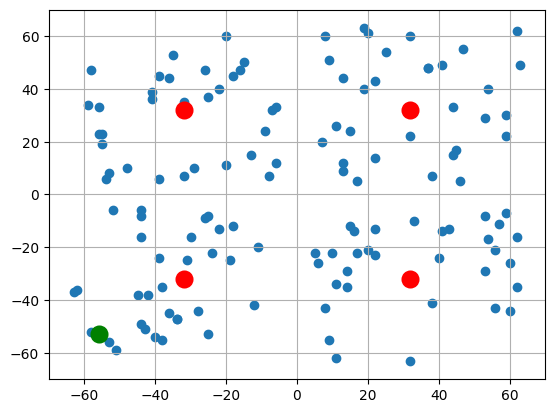

In [ ]:
plt.scatter(Individuos[:,1], Individuos[:,0]) #posicionamento dos eixos x e y
plt.scatter(Centroides[:,1], Centroides[:,0], s = 100, linewidths=3, c = 'red') #posicionamento dos eixos x e y
plt.scatter(Individuos[64,0], Individuos[64,1], s = 100, linewidths=3, c = 'green') #posicionamento dos eixos x e y
plt.xlim(-70, 70) #range do eixo x
plt.ylim(-70, 70) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico

In [ ]:
df = pd.DataFrame(Individuos)
print(df)

      0   1
0    26  11
1    62  62
2    48  37
3    51   9
4    61  20
..   ..  ..
123  60 -20
124  47 -58
125  35 -32
126  45 -39
127  33  -6

[128 rows x 2 columns]


In [ ]:
kmeans = KMeans(n_clusters = 4, #numero de clusters
                random_state=0,
                init = Centroides,
                n_init = "auto", #algoritmo que define a posição dos clusters de maneira mais assertiva
                max_iter = 1, #numero máximo de iterações
                algorithm='lloyd')

kmeans.fit(df)
pred_y = kmeans.fit_predict(df)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Adicionando os rótulos de cluster ao DataFrame
df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:878: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.init == "k-means++":
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:878: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.init == "k-means++":
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


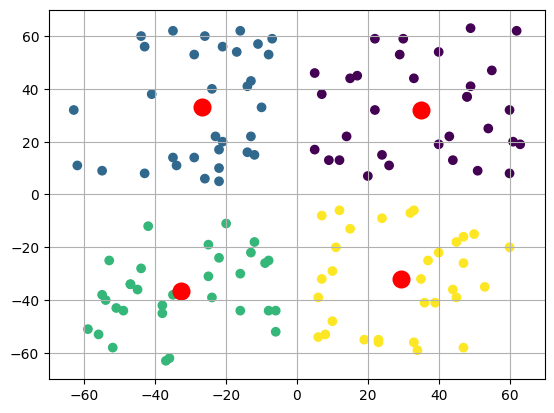

In [ ]:
plt.scatter(Individuos[:,0], Individuos[:,1], c=labels, cmap='viridis') #posicionamento dos eixos x e y
plt.xlim(-70, 70) #range do eixo x
plt.ylim(-70, 70) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, linewidths=3, c = 'red') #posição de cada centroide no gráfico
plt.show()

In [ ]:
print(df)

      0   1  Cluster
0    26  11        0
1    62  62        0
2    48  37        0
3    51   9        0
4    61  20        0
..   ..  ..      ...
123  60 -20        3
124  47 -58        3
125  35 -32        3
126  45 -39        3
127  33  -6        3

[128 rows x 3 columns]


In [ ]:
print(df[60:70])

     0   1  Cluster
60 -23  22        1
61 -29  14        1
62 -17  54        1
63 -63  32        1
64 -56 -53        2
65 -16 -30        2
66 -16 -44        2
67 -47 -34        2
68 -45 -36        2
69 -59 -51        2


In [ ]:
# Salvando para arquivo CSV
df.to_csv("Kmeans-Ind128CAR2.csv")

In [ ]:
print(df['Cluster']==3)

0      False
1      False
2      False
3      False
4      False
       ...  
123     True
124     True
125     True
126     True
127     True
Name: Cluster, Length: 128, dtype: bool


In [ ]:
cluster_centers = kmeans.cluster_centers_  # Obtém os centroides de cada cluster
cluster_sizes = df['Cluster'].value_counts()  # Obtém o número de pontos em cada cluster
print(cluster_sizes)
print(cluster_centers)

0    32
1    32
2    32
3    32
Name: Cluster, dtype: int64
[[ 34.90625  32.0625 ]
 [-26.71875  33.09375]
 [-32.75    -36.71875]
 [ 29.3125  -32.15625]]
